# **Seminar: Politische Debatten & Polarisierung im Bundestag**
## Sentimentanalyse im Kontext von Corona

In [17]:
# Import Basic Packages
import numpy as np                 # Numpy
import pandas as pd                 #Datafrane

# Import Visualization Packages
from collections import Counter     # um worte zu zählen
import matplotlib.pyplot as plt   # Für Visualisierung
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Wordcloud erstellen
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp


# Import NLP Packages
import nltk
import spacy

In [18]:
# Methoden aus anderem File importieren
import Methoden_Sentiment

ModuleNotFoundError: No module named 'Methoden_Sentiment'

## 1. Datensatz vorbereiten

### Datensatz einlesen

In [5]:
# df Legislaturperiode 2019 (24.10.2017-26.09.21)
# Import des vorselektierten Dataframes mit gegebenen Sentiment 
df_sentiment19 = pd.read_csv(r"C:\Users\paula\OneDrive\Uni\2. Lernpools Master\3. Semester\Soziologie\modellorginal.csv")
df_sentiment19['date'] = pd.to_datetime(df_sentiment19['date'])
df_sentiment19.sort_values(by='date')

# df Legislaturperiode 2020 (24.10.2017-26.09.21)


,Unnamed: 0,satz,id,period,date,name,party,redner_id,discussion_title,text,tokenized_text,tokens,cleaned_text,Sentiment_Label,Sentiment_Score
19286,20026,Europa und die Globalisierung: Das ist heute d...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['Europa', 'Globalisierung', 'heute', 'Rahmen'...",Europa Globalisierung heute Rahmen debattieren...,neutral,0.999854
19187,19927,Er war zwölf Jahre ein großartiger Bundestagsp...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['zwölf', 'Jahre', 'großartiger', 'Bundestagsp...",zwölf Jahre großartiger Bundestagspräsident,neutral,0.999984
19186,19926,"Vor allen Dingen aber, meine sehr verehrten Da...",ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['Dingen', 'verehrten', 'möchte', 'Norbert', '...",Dingen verehrten möchte Norbert Lammert danken,neutral,0.958987
19185,19925,Damit nehme ich jetzt die Wahl vorweg; das ist...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['nehme', 'Wahl', 'vorweg', 'bisschen', 'schwi...",nehme Wahl vorweg bisschen schwierig,positive,0.843615
19184,19924,Ich danke natürlich auch den beiden Vizepräsid...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['danke', 'natürlich', 'beiden', 'Vizepräsiden...",danke natürlich beiden Vizepräsidentinnen näch...,neutral,0.978398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48520,50363,"Aber, meine Damen und Herren, im Großen und Ga...",ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['Großen', 'Ganzen', 'deutliche', 'Fortschritt...",Großen Ganzen deutliche Fortschritte gemacht r...,positive,0.962056
48519,50362,"Es gibt kleine Schwierigkeiten nach wie vor, a...",ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['gibt', 'kleine', 'Schwierigkeiten', 'vielen'...",gibt kleine Schwierigkeiten vielen Stellen gra...,neutral,0.999985
48518,50361,"Das sind Dinge, die kann man benennen.",ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['Dinge', 'benennen']",Dinge benennen,negative,0.708503
48527,50370,Deshalb kann man sagen: Als ich 2005 Bundeskan...,ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['Deshalb', 'sagen', '2005', 'Bundeskanzlerin'...",Deshalb sagen 2005 Bundeskanzlerin wurde lagen...,neutral,0.986180


## 4. Deskriptive Datenanalyse

In [6]:
plot_most_frequent_ngrams (df_sentiment19)

NameError: name 'plot_most_frequent_ngrams' is not defined

## 5. Sentimentanalyse

### Modellentwicklung

In [28]:
#Wir beginnen mit dem Methodenaufruf, um unsere Sentiment Modell german-bert anzuwenden, dieses werden wir auf dem cleaned text und dem original text anwenden 
import torchvision

#Original Text
modell_original = sentiment_analysis(df_grundrechte_cleaned, 'satz')
modell_original.head (15)

c:\Users\paula\anaconda3\envs\env1\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\paula\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\paula\AppData\Local\Temp\ipykernel_14252\3868136605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,satz,id,period,date,name,party,redner_id,discussion_title,text,tokenized_text,tokens,cleaned_text,Sentiment_Label,Sentiment_Score
2,Wenn ich manche Rede zu Griechenland in den le...,ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[Rede, Griechenland, letzten, acht, Jahren, Re...",Rede Griechenland letzten acht Jahren Revue pa...,neutral,0.749268
3,Wir haben nun das fünfte Land guten Gewissens ...,ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[fünfte, Land, guten, Gewissens, dahin, gebrac...",fünfte Land guten Gewissens dahin gebracht zuk...,neutral,0.999989
4,"Wenn hier so getan wird, als ob wir zu viel So...",ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[getan, Solidarität, geleistet, frage, immer, ...",getan Solidarität geleistet frage immer Wer Ha...,neutral,0.965564
5,Das ist die Bundesrepublik Deutschland.,ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[Bundesrepublik, Deutschland]",Bundesrepublik Deutschland,neutral,0.992915
6,"Ich finde, das muss man herausstreichen, gerad...",ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[finde, herausstreichen, gerade, schwierigen, ...",finde herausstreichen gerade schwierigen Zeit ...,neutral,0.497774
7,"Wenn wir die Euro-Zone nicht hätten, würden wi...",ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[Euro-Zone, nicht, hätten, Gebieten, nicht, Lö...",Euro-Zone nicht hätten Gebieten nicht Lösungen...,negative,0.914274
8,"Wer wirklich meint, dass jeder in Europa mit s...",ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[Wer, wirklich, meint, Europa, eigenen, Währun...",Wer wirklich meint Europa eigenen Währung Hera...,neutral,0.998713
9,Natürlich kann man immer wieder die Frage stel...,ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[Natürlich, immer, Frage, stellen, Warum, Grie...",Natürlich immer Frage stellen Warum Griechen r...,negative,0.970739
10,Anfang der 2000er-Jahre war der Beitritt in di...,ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[Anfang, 2000er-Jahre, Beitritt, Euro-Zone]",Anfang 2000er-Jahre Beitritt Euro-Zone,neutral,0.999984
11,2010 war der Beginn der Krise.,ID194300300,19,2018-06-29,Eckhardt Rehberg,CDU/CSU,11003826,Zusatzpunkt 11 2018-06-29,Herr Präsident! Liebe Kolleginnen und Kollegen...,"[Herr Präsident!, Liebe Kolleginnen und Kolleg...","[2010, Beginn, Krise]",2010 Beginn Krise,neutral,0.998708


In [29]:
modell_original.to_csv('modellorginal.csv')

In [ ]:
#Modellaufruf mit preprocessed Text
modell_processed = sentiment_analysis(df_grundrechte_cleaned, 'cleaned_text')
modell_processed.head (15)

modell_processed.to_csv('file1.csv')

NameError: name 'sentiment_analysis' is not defined

### Packages für Sentimentanalyse

In [ ]:
#modell_processed = sentiment_analysis(df_grundrechte_cleaned, 'cleaned_text')
#modell_original = sentiment_analysis(df_grundrechte_cleaned, 'satz')

#df_difference = df_grundrechte_cleaned.copy()
#df_difference = df_difference.drop(columns=['id', 'period', 'date', 'discussion_title', 'text_token'], axis=1)

#df_difference['Sentiment_Cleaned'] = modell_processed['Sentiment_Label']
#df_difference['Score_Cleaned'] = modell_processed['Sentiment_Score']

#df_difference['que'] = np.where((df_difference['Sentiment_Label'] == df_difference['Sentiment_Cleaned']), df_difference['Sentiment_Label'], np.nan)

#df_difference = df_difference[df_difference['que'].isna()]
#df_difference = df_difference.drop(['que', 'redner_id', 'party'], axis=1)


In [ ]:
plot_sentiment_analysis(modell_original, modell_processed)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

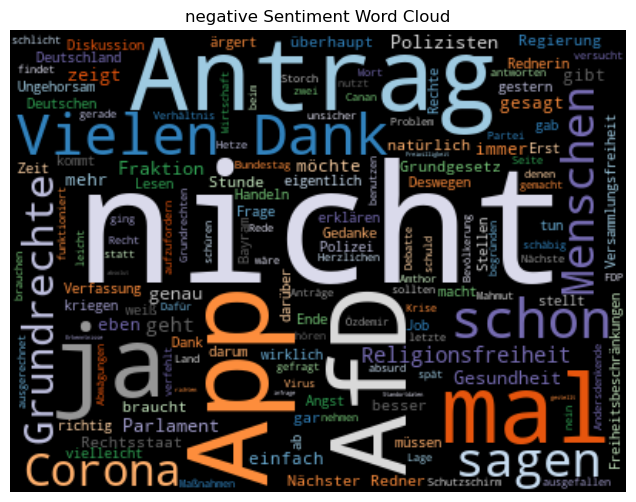

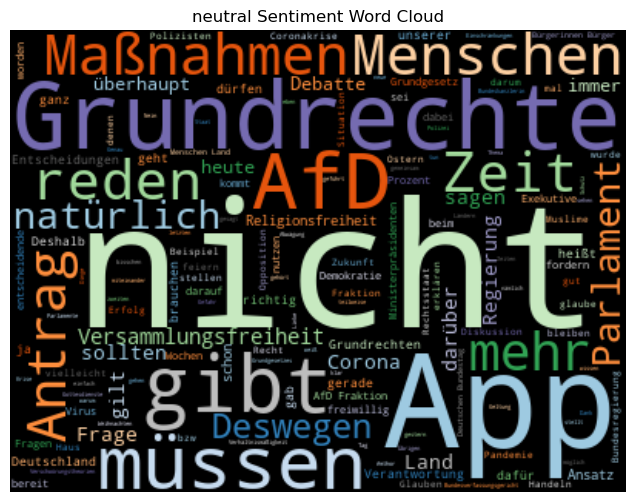

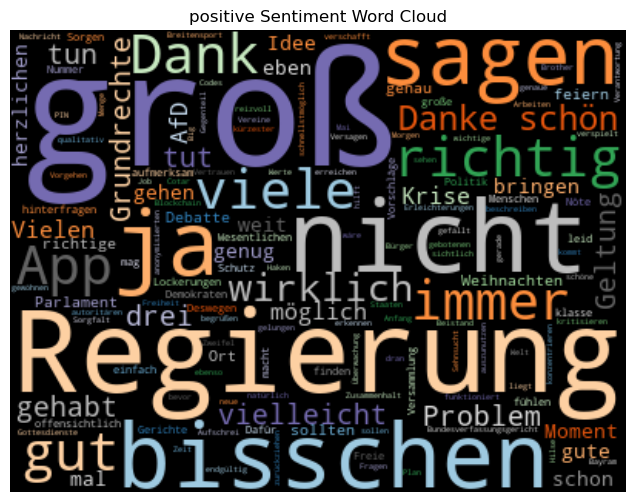

In [ ]:
plot_sentiment_wordclouds (modell_processed)

### Sentiment-Analyse nach Parteizugehörigkeit

In [ ]:
# Plotten nach Parteizugehörigkeit durch Methodenaufrufe plot Sentiment by party
plot_sentiment_by_party(modell_processed)

plot_sentiment_by_party(modell_original)

